## Задания  

1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.  
2. Какой клиент совершил больше всего успешных операций? (success == True)  
3. С какой платформы осуществляется наибольшее количество успешных операций?  
4. Какую платформу предпочитают премиумные клиенты?  
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)  
6. Постройте график распределения числа успешных операций  
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?  
        
## Описание данных  

`user_data`:

· client – идентификатор пользователя  
· premium – является ли клиент премиум  
· age – возраст  

`logs`:  

· client – идентификатор пользователя  
· success – результат (успех - 1, нет - 0)  
· platform – платформа  
· time – время в формате Unix  

### 1

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd

In [15]:
user_data = pd.read_csv('3_logs.csv')
logs = pd.read_csv('3_user_data.csv')

In [3]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [4]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [5]:
user_data.platform.nunique()

3

### 2

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

In [6]:
user_data

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [7]:
success_counts = user_data.loc[user_data.success == True].client.value_counts()
success_counts

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: client, Length: 2845, dtype: int64

In [8]:
max_success = success_counts.max()
max_success

41

In [9]:
max_success_users = success_counts.loc[success_counts == max_success]
max_success_users

28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: client, dtype: int64

In [10]:
max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

### 3

С какой платформы осуществляется наибольшее количество успешных операций?

In [19]:
user_data.loc[user_data.success == True].platform.value_counts().idxmax()

'phone'

### 4

Какая платформа наиболее популярна среди премиумных клиентов?

In [20]:
premium_logs = user_data.merge(logs, on='client')
premium_logs.loc[premium_logs.success == True].platform.value_counts().idxmax()

'phone'

### 5

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасэт, который вы получили на предыдущем шаге

In [31]:
import seaborn as sns

In [29]:
premium_logs

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

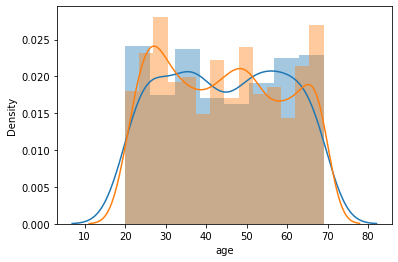

In [37]:
sns.distplot(premium_logs.loc[premium_logs.premium == True].age)
sns.distplot(premium_logs.loc[premium_logs.premium == False].age)

### 6

Постройте график распределения числа успешных операций: 

· x – число успешных операций  
· y – число клиентов, совершивших столько успешных операций  

Выберите подходящие утверждения:
    
· __Несколько клиентов совершили более 40 успешных действий__    
· Бóльшая часть наблюдений сосредоточена в правой части графика  
· Все клиенты совершили не более 5 успешных операций  
· __Бóльшая часть наблюдений сосредоточена в левой части графика__   

In [44]:
success_counts = user_data.loc[user_data.success == True].client.value_counts()
success_counts

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: client, Length: 2845, dtype: int64

In [45]:
success_counts = success_counts.rename('successes')

<AxesSubplot:xlabel='successes', ylabel='count'>

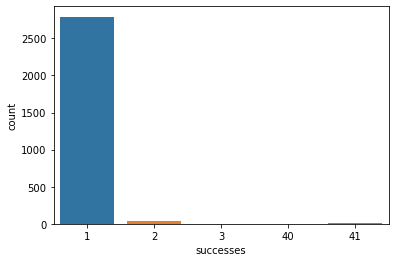

In [46]:
sns.countplot(x=success_counts)

### ★ 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [53]:
import matplotlib.pyplot as plt

In [50]:
premium_logs

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


<AxesSubplot:xlabel='age', ylabel='count'>

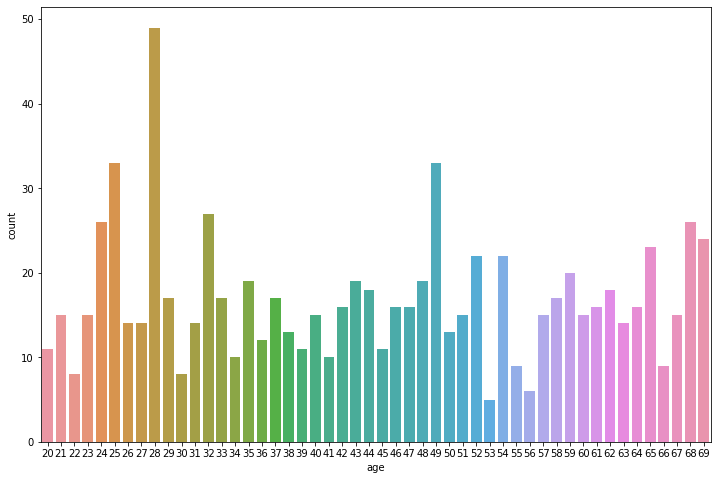

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(data=premium_logs.loc[(premium_logs.platform == 'computer') & (premium_logs.success == True)], x='age')